### ChatGPT 5 Model

Testing 100 sentences of Penn Dataset manually, gathering response, and comparing results

In [23]:
import nltk
from nltk.corpus import treebank
import random


# Set random seed for reproducibility
random.seed(42)
# Make sure you have the corpora
nltk.download('treebank')
nltk.download('universal_tagset')


# Convert to list so we can sample
test_sentences = list(treebank.tagged_sents(tagset='universal'))

print(f"Total sentences: {len(sentences)}")

# Now sample 100
gpt_test_sentences = random.sample(test_sentences, 100)

print(f"Sampled {len(test_sentences)} sentences.")
print("\nExample sentence:\n", test_sentences[0])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Total sentences: 3914
Sampled 3914 sentences.

Example sentence:
 [('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')]


In [24]:
gpt_test_sentences[0]

[('In', 'ADP'),
 ('*', 'X'),
 ('using', 'VERB'),
 ('program', 'NOUN'),
 ('trading', 'NOUN'),
 ('as', 'ADP'),
 ('a', 'DET'),
 ('whipping', 'ADJ'),
 ('boy', 'NOUN'),
 (',', '.'),
 ('fundamentalist', 'ADJ'),
 ('investors', 'NOUN'),
 ('stand', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('gain', 'VERB'),
 ('the', 'DET'),
 ('high', 'ADJ'),
 ('ground', 'NOUN'),
 ('in', 'ADP'),
 ('*', 'X'),
 ('wooing', 'VERB'),
 ('small', 'ADJ'),
 ('investors', 'NOUN'),
 ('for', 'ADP'),
 ('their', 'PRON'),
 ('existing', 'VERB'),
 ('stock-selection', 'ADJ'),
 ('products', 'NOUN'),
 ('.', '.')]

In [25]:
sentences_to_input_gpt = [[word for word, tag in sent] for sent in gpt_test_sentences]
print(sentences_to_input_gpt[:2])

[['In', '*', 'using', 'program', 'trading', 'as', 'a', 'whipping', 'boy', ',', 'fundamentalist', 'investors', 'stand', '*-1', 'to', 'gain', 'the', 'high', 'ground', 'in', '*', 'wooing', 'small', 'investors', 'for', 'their', 'existing', 'stock-selection', 'products', '.'], ['Polls', 'once', 'named', 'Tokyo', 'Giants', 'star', 'Tatsunori', 'Hara', ',', 'a', '``', 'humble', ',', 'uncomplaining', ',', 'obedient', 'soul', ',', "''", 'as', 'the', 'male', 'symbol', 'of', 'Japan', '.']]


In [17]:
ans_by_gpt = [('Polls', 'NOUN'),        # subject
 ('once', 'ADV'),          # adverb
 ('named', 'VERB'),        # verb
 ('Tokyo', 'NOUN'),        # proper noun (treated as NOUN in Universal set)
 ('Giants', 'NOUN'),       # proper noun
 ('star', 'NOUN'),         # noun
 ('Tatsunori', 'NOUN'),    # proper noun
 ('Hara', 'NOUN'),         # proper noun
 (',', '.'),               # punctuation
 ('a', 'DET'),             # determiner
 ('``', '.'),              # opening quote treated as punctuation
 ('humble', 'ADJ'),        # adjective
 (',', '.'),               # punctuation
 ('uncomplaining', 'ADJ'), # adjective
 (',', '.'),               # punctuation
 ('obedient', 'ADJ'),      # adjective
 ('soul', 'NOUN'),         # noun
 (',', '.'),               # punctuation
 ("''", '.'),              # closing quote punctuation
 ('as', 'ADP'),            # preposition
 ('the', 'DET'),           # determiner
 ('male', 'ADJ'),          # adjective
 ('symbol', 'NOUN'),       # noun
 ('of', 'ADP'),            # preposition
 ('Japan', 'NOUN'),        # proper noun
 ('.', '.')]               # period

In [18]:
correct = 0
total = 0
for original, gpt_answer in zip(gpt_test_sentences[1], ans_by_gpt):
    or_Word, or_tag = original
    gpt_Word, gpt_tag = gpt_answer
    if or_Word == gpt_Word:
        if or_tag == gpt_tag:
            correct += 1
        else:
            print(original)
            print(gpt_answer)
    else:
        print(or_Word)
    total += 1
    

In [19]:
print(correct/total)

1.0


In [29]:
def prompt(sent_list):
    prompt_to_return = f"""
You are a Part-of-Speech (POS) tagger.  
Your task is to assign **Universal POS tags** to each word in a given sentence.  
The Universal POS tagset is limited to the following categories:  
['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']  

### Instructions:
- Input will be a **list of words** (Python list format).  
- Output must be a python **list of (word, tag) tuples**.  
- Use only the Universal POS tags listed above.  
- Punctuation such as `, . ? ! " `` ''` should be labeled as `'.'`.  
- Proper nouns (names, places, organizations) should be tagged as `NOUN`.  
- Words not fitting any category should be tagged as `X`.  

### Example:
Input: ['The', 'cat', 'sat', 'on', 'the', 'mat', '.']  
Output: [('The', 'DET'), ('cat', 'NOUN'), ('sat', 'VERB'), ('on', 'ADP'), ('the', 'DET'), ('mat', 'NOUN'), ('.', '.')]  

### Now tag the following sentence:
Input: {sent_list}
Output:
"""
    return prompt_to_return

In [30]:
print(prompt(gpt_test_sentences[1]))


You are a Part-of-Speech (POS) tagger.  
Your task is to assign **Universal POS tags** to each word in a given sentence.  
The Universal POS tagset is limited to the following categories:  
['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']  

### Instructions:
- Input will be a **list of words** (Python list format).  
- Output must be a python **list of (word, tag) tuples**.  
- Use only the Universal POS tags listed above.  
- Punctuation such as `, . ? ! " `` ''` should be labeled as `'.'`.  
- Proper nouns (names, places, organizations) should be tagged as `NOUN`.  
- Words not fitting any category should be tagged as `X`.  

### Example:
Input: ['The', 'cat', 'sat', 'on', 'the', 'mat', '.']  
Output: [('The', 'DET'), ('cat', 'NOUN'), ('sat', 'VERB'), ('on', 'ADP'), ('the', 'DET'), ('mat', 'NOUN'), ('.', '.')]  

### Now tag the following sentence:
Input: [('Polls', 'NOUN'), ('once', 'ADV'), ('named', 'VERB'), ('Tokyo', 'NOUN'), ('Giants', 'NOUN'

In [38]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 9.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip


In [39]:
import pandas as pd

# Build dataframe
data = []
for original, sent in zip(gpt_test_sentences, sentences_to_input_gpt):
    input_prompt = prompt(sent)          # full multiline prompt
    ground_truth = str(original)         # convert tuple list to string for Excel
    data.append({
        "input_prompt": input_prompt,
        "output_response": "",
        "ground_truth": ground_truth
    })

df = pd.DataFrame(data)

# Save to Excel
file_path = "gpt_pos_tag_prompts_with_groundtruth.xlsx"
df.to_excel(file_path, index=False, engine="openpyxl")

print(f"Saved Excel file at: {file_path}")

Saved Excel file at: gpt_pos_tag_prompts_with_groundtruth.xlsx


### Testing 100 sentences

In [17]:
import nltk
from nltk.corpus import treebank
import random


random.seed(42)
# Make sure you have the corpora
nltk.download('treebank')
nltk.download('universal_tagset')


test_sentences = list(treebank.tagged_sents(tagset='universal'))
gpt_test_sentences = random.sample(test_sentences, 100)


start_tag = '^'
tags = set(tag for sent in test_sentences for _, tag in sent)
sorted_tags = sorted(tags)
sorted_tags.append(start_tag)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [9]:
actual_tags = []
tag_predicted = []

In [23]:
import pandas as pd
import ast
import re

df = pd.read_excel('GPT_testing.xlsx')

correct = 0
total = 0

def clean_string(s):
    # Replace double double-quotes with single double-quote
    s = s.replace('""', '"')
    # Replace curly quotes with straight quotes
    s = s.replace('“', '"').replace('”', '"').replace("‘", "'").replace("’", "'")
    # Remove any leading/trailing whitespace
    s = s.strip()
    return s

num_word_mismatch = 0
for idx, row in df.iterrows():
    gt_str = clean_string(row['ground_truth'])
    out_str = clean_string(row['output_response'])

    try:
        ground_truth = ast.literal_eval(gt_str)
        gpt_answer = ast.literal_eval(out_str)
    except Exception as e:
#         print(f"Error parsing row {idx}: {e}")
        continue

    for (or_word, or_tag), (gpt_word, gpt_tag) in zip(ground_truth, gpt_answer):
        if or_word == gpt_word:
            actual_tags.append(or_tag)
            tag_predicted.append(gpt_tag)
            if or_tag == gpt_tag:
                correct += 1
#             else:
#                 print("Tag mismatch:", (or_word, or_tag), "vs", (gpt_word, gpt_tag))
        else:
            num_word_mismatch += 1
            continue
#             print("Word mismatch:", or_word, gpt_word)
        total += 1

accuracy = 100*(correct / total) if total > 0 else 0
print(f"Accuracy: {accuracy:.2f}%")
# print(f"Number of Word Mismatch: {num_word_mismatch} out of Total {total} words")


Accuracy: 94.09%


### ChatGPT LLM Analysis

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(actual_tags, tag_predicted)
precision = precision_score(actual_tags, tag_predicted, average="weighted")
recall = recall_score(actual_tags, tag_predicted, average="weighted")
f1 = f1_score(actual_tags, tag_predicted, average="weighted")

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

Accuracy : 0.94
Precision: 0.94
Recall   : 0.94
F1 Score : 0.94


In [25]:
from sklearn.metrics import classification_report
print(classification_report(actual_tags, tag_predicted))

              precision    recall  f1-score   support

           .       1.00      0.94      0.97       550
         ADJ       0.86      0.92      0.88       310
         ADP       0.93      0.89      0.91       554
         ADV       0.93      0.82      0.87       186
        CONJ       0.74      0.99      0.85       113
         DET       0.95      0.93      0.94       494
        NOUN       0.98      0.97      0.97      1547
         NUM       0.80      0.96      0.87       148
        PRON       0.77      0.94      0.84       126
         PRT       0.88      0.93      0.90       182
        VERB       0.99      0.96      0.98       689
           X       0.89      0.90      0.90       285

    accuracy                           0.94      5184
   macro avg       0.89      0.93      0.91      5184
weighted avg       0.94      0.94      0.94      5184



### Per-POS Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

labels = sorted_tags
cm = confusion_matrix(actual_tags, tag_predicted, labels=labels)

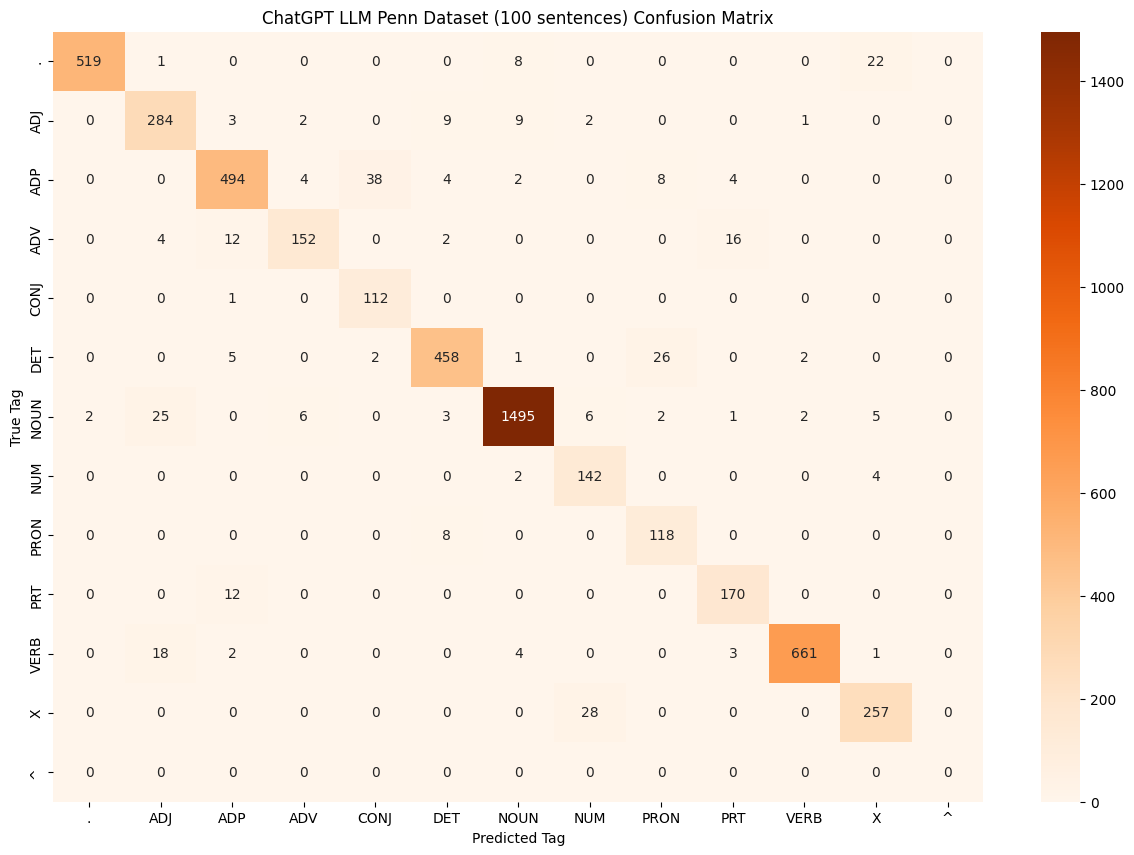

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Tag")
plt.ylabel("True Tag")
plt.title("ChatGPT LLM Penn Dataset (100 sentences) Confusion Matrix")
plt.show()